# Correlation

Julia code used to generate the plots for the correlation blog post.

In [1]:
using Plots
using Statistics # Defines mean.

┌ Info: Recompiling stale cache file /home/rik/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


## Covariance

Plots for covariance $ cov(X, Y) = E[(X - \mu_X)(Y - \mu_Y)]$

In [2]:
range = 1:7
A = (x -> x + 1).(range)
B = (x -> 0.5x + 3).(range)
C = (x -> 5).(range)
D = reverse(A)
@show A, B, C, D;

(A, B, C, D) = ([2, 3, 4, 5, 6, 7, 8], [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5], [5, 5, 5, 5, 5, 5, 5], [8, 7, 6, 5, 4, 3, 2])


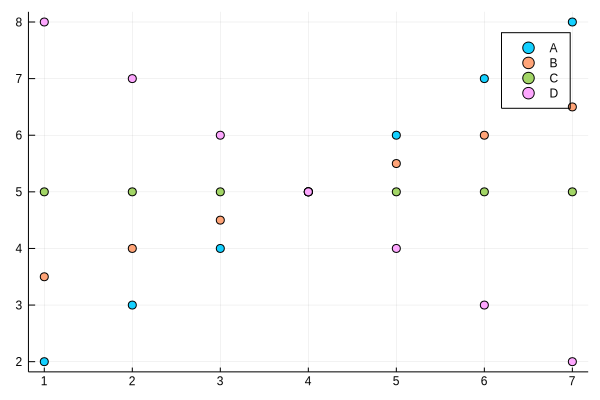

In [3]:
plot(range, [A, B, C, D], seriestype=:scatter, label=["A" "B" "C" "D"], lw=3, background_color=:transparent, foreground_color=:black)

In [4]:
savefig("correlation.svg")

In [5]:
# Note that unlike the Julia built-in function this function does not apply Bessel's correction.
function mycov(X, Y)
    min_mean_x(x)::Float64 = x - mean(X)
    min_mean_y(y)::Float64 = y - mean(Y)
    
    mean(min_mean_x.(X) .* min_mean_y.(Y))
end

mycov (generic function with 1 method)

In [6]:
mycov(A, A)

4.0

In [7]:
mycov(A, B)

2.0

In [8]:
mycov(A, C)

0.0

In [9]:
mycov(A, D)

-4.0